<a href="https://colab.research.google.com/github/sathwikkes/Yelp-Image-Classification/blob/main/data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Image Classification

In this project, I will be working with the Yelp image data set and that can be found by following this link.   
https://www.yelp.com/dataset 

After commenting out the code, you can run the cell below to check all the packages and their versions that we have access too. 

In [1]:
#!pip list -v 

I had a hard time uploading a folder with almost 200,000 photos into my google drive in one go. I made a script with the help of this resource and split the big folder into subfolders to play around with.  
https://gist.github.com/zupo/5849843

## Importing Libraries

In [2]:
# necessary packages/modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import glob 
import os 
import io
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import cv2

## Loading the Data

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import files
uploaded = files.upload()

Saving photos.json to photos (1).json


In [5]:
# !ls "/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics"

In [6]:
data = pd.read_json(uploaded.get('photos.json'), lines=True)


## Data Exploration & Wrangling

In [7]:
data.head()

,photo_id,business_id,caption,label
0,001kKc6P_rmgaXThAHxEkw,zKZc8GwCaKbACaV0HZAmpg,Clean and simple interior,inside
1,002gqWfVal1D2DT6oA-bVQ,qnZzSC4TKen19Gz9nyKCvw,12oz. Boneless Ribeye | Grilled to perfection ...,food
2,002GtTSYyQ4swIZyEnfF5A,9km51KaQujxsSgdaG9gYSw,"The Most Yummy Tarts: Chantilly, Guava, Salted...",food
3,0036yehPJxVwNZDRDYH2jQ,Qg9L37JCd-PkcWMj9VAWmw,Dynamic Duo! Great dance music!,inside
4,003Isvt6NCJ567PdAEwrfA,zgQHtqX0gqMw1nlBZl2VnQ,,food


In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.shape

(200000, 4)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   photo_id     200000 non-null  object
 1   business_id  200000 non-null  object
 2   caption      200000 non-null  object
 3   label        200000 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


In [11]:
data.describe()

,photo_id,business_id,caption,label
count,200000,200000,200000,200000
unique,200000,39830,72475,5
top,yiQQJQ1qRYQAkGZlcjSFbw,RESDUcs7fIiihp38-d6_6g,,food
freq,1,652,107420,118597


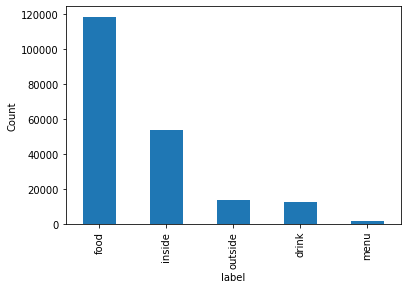

In [12]:
data.label.value_counts().plot(kind='bar', xlabel='label', ylabel='Count')

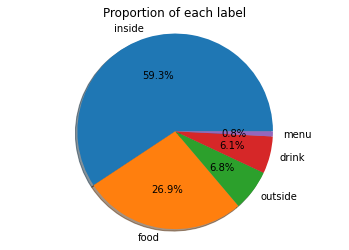

In [13]:
plt.pie(data.label.value_counts(), explode=None, labels= data.label.unique(), shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each label')
plt.show()

### Reading in the Photos

In [14]:
img_dir_train = '/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics' 

data_path = os.path.join(img_dir_train,'*g')

files = glob.glob(data_path)

# creaing dictionary with key as photo_id and value as image path
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x 
                     for x in glob.glob(data_path)}


In [15]:
data['path'] = data['photo_id'].map(imageid_path_dict.get)

In [16]:
#img_dir_test = '/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/test'
#data_path_test= os.path.join(img_dir_test, '*g')
#files_test = glob.glob(data_path_test)
#imageid_path_dict_test = {os.path.splitext(os.path.basename(x))[0]: x 
                     #for x in glob.glob(data_path_test)}

In [17]:
#data['path'] = data['photo_id'].map(imageid_path_dict_test.get)

In [18]:
# listing all the paths of the pictures that were imported
data[data.path.notnull()]['path']

636       /content/drive/MyDrive/Colab-Notebooks/yelp-im...
933       /content/drive/MyDrive/Colab-Notebooks/yelp-im...
1044      /content/drive/MyDrive/Colab-Notebooks/yelp-im...
1167      /content/drive/MyDrive/Colab-Notebooks/yelp-im...
1367      /content/drive/MyDrive/Colab-Notebooks/yelp-im...
                                ...                        
199363    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199600    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199647    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199648    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199985    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
Name: path, Length: 1000, dtype: object

In [19]:
df = data[data.path.notnull()]

In [20]:
df['class_by_number'] = pd.Categorical(df['label']).codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df.iloc[636]['path']

'/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/palsLqpRPPsPvLOOMu0Tvw.jpg'

In [23]:
img = cv2.imread('/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0bhL0XvLMxn-W-fu2c7pkA.jpg') 

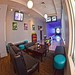

In [24]:
# have to import this module bc cv2.imshow() does not work in colab
# images read in opencv are in the format of blue green red
cv2_imshow(img)  

In [25]:
print(img.shape)
print(type(img))

(75, 75, 3)
<class 'numpy.ndarray'>


### Image Manipulation & Fundamentals

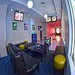

In [26]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
cv2_imshow(image_rgb) 

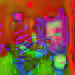

In [27]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv) 

In [28]:
#image2 = mpimg.imread("/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0bhL0XvLMxn-W-fu2c7pkA.jpg")
#plt.imshow(image2)

In [29]:
df.loc[1044]['path']

'/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0FfYeFWmxcJqxwyN5PZPbw.jpg'

In [30]:
img2 = cv2.imread('/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0FfYeFWmxcJqxwyN5PZPbw.jpg')

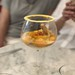

In [31]:
cv2_imshow(img2)

In [32]:
df.loc[1167]['path']

'/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0glSs9z_jEE5VYVUwrsFIA.jpg'

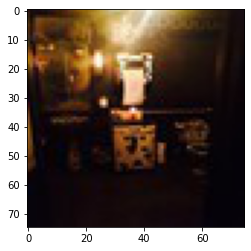

In [33]:
# viewing an image using matplotlib
mimage = mpimg.imread("/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics/0glSs9z_jEE5VYVUwrsFIA.jpg")
plt.imshow(mimage)

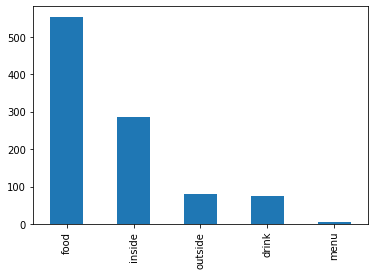

In [34]:
df.label.value_counts().plot.bar()
plt.show()

In [35]:
def rand_pic():
  """
  function that displays a random image from the dataset
  """
  
  index =int(np.random.choice(df.index, 1))
  path = df.loc[index]['path']
  plt.figure()
  img = mpimg.imread(path)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title("IMG # {} -".format(index) + " " + df.loc[index]['label'])
  plt.imshow(img)

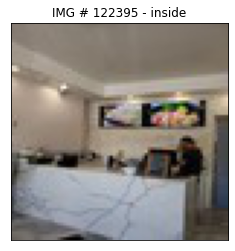

In [36]:
#df.loc[np.random.choice(df.index, 1)]
rand_pic()

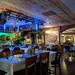

In [37]:
#double checking if the image is correctly identified
path = df.loc[116113]['path']
x=cv2.imread(path)
cv2_imshow(x)

In [38]:
classes = ['drink', 'food', 'inside', 'menu', 'outside']
num_classes = len(classes)
classes_with_numbers = {0: 'drink',
                      1: 'food',
                      2: 'inside',
                      3: 'menu',
                      4: 'outside'
                    }

In [39]:
df.head()

,photo_id,business_id,caption,label,path,class_by_number,image
636,0bhL0XvLMxn-W-fu2c7pkA,H4E4sZ6PKBef65hU0GKi_g,"Our Kingpin room has 2 lanes, private bar acce...",inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[166, 116, 83], [161, 112, 80], [165, 118, 8..."
933,0eFLVEyJhskLZgnbecseKg,PIpCmok4zzozeSI7iT9H9A,,outside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,4,"[[[137, 153, 205], [136, 152, 204], [134, 150,..."
1044,0FfYeFWmxcJqxwyN5PZPbw,umXvdus9LbC6oxtLdXelFQ,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[83, 59, 47], [124, 102, 91], [154, 137, 127..."
1167,0glSs9z_jEE5VYVUwrsFIA,woXlprCuowrLJswWere3TQ,,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[42, 18, 16], [26, 12, 12], [24, 17, 24], [2..."
1367,0ifISIekaQ9xge4_fXyHwg,2FfZUyA82YhQCjWNiqDCzQ,Inside Lenny's!,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[78, 69, 74], [58, 48, 49], [51, 35, 36], [5..."


In [40]:
df.shape

(1000, 7)

In [41]:
df['image'].map(lambda x:x.shape).value_counts()

(75, 75, 3)    1000
Name: image, dtype: int64

Resizing all the Images

In [42]:
#-----------------------------------RESIZING images------------------------------------
#dir = "/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics"

#for filename in glob.iglob(dir + '/*.jpg'):
#  im = Image.open(filename)
#  imResize = im.resize((75,75), Image.ANTIALIAS)
#  imResize.save(filename, 'JPEG', quality = 90)

Create and Compile a Model

1. Build the model
    *   3 Layer Fully Connected Convolutional Neural Network
    *   XGBoost 
2. Run the model
3. Train/Fit the data to the model
4. Evaluate the model on the test set 
5. Error Analysis

## Preprocessing

### Shuffle the data

In [43]:
from sklearn.utils import shuffle
import random
shuffle(df)

,photo_id,business_id,caption,label,path,class_by_number,image
4675,1ja5zoVg25Y7SGk8a7p4rw,wo6Z6VLOJejln04CsoX1WQ,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[127, 136, 43], [103, 111, 28], [98, 103, 36..."
45313,C2FW08l2Ccn8StRAD1gjzA,928Rcwe2KqeamUkhSCwP4A,T-shirts for sale.,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[56, 58, 55], [63, 65, 62], [75, 76, 71], [7..."
161673,u3GLVDmU0NcToEMLzSYm7Q,3fPIRTnBhd81MixgS9YoMQ,Dumplings,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[177, 131, 71], [176, 131, 74], [175, 134, 8..."
157616,tHsW09fPrcN2GoZBurzE4g,h7vh4Ai3-W4e1sMKhJUNQw,yakisoba 7.95/9.95,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[46, 13, 8], [40, 15, 8], [37, 14, 8], [41, ..."
135260,pzGjAzDGPlM_wGbRlqRJXg,LsfKW67Qe_0bU4krXEkOAA,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[255, 253, 255], [255, 253, 255], [255, 253,..."
...,...,...,...,...,...,...,...
99139,kIcjQbHT2peU3mpTLMG3Nw,rDt7Bz9Mare4ZfmxQcBD0g,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[90, 60, 22], [94, 64, 26], [89, 59, 23], [9..."
7446,2fDP1vtkarp2eUAQQf2mFg,vHz2RLtfUMVRPFmd7VBEHA,,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[67, 54, 35], [113, 100, 81], [136, 123, 104..."
70151,fXgnab2-05XFfsL1MszZvQ,k1mNR7eIi-UWVmj_t23Yog,Japchae - sweet potato noodles with tofu,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[76, 38, 37], [73, 33, 33], [71, 31, 31], [7..."
23663,7FumJ9vWnU8KWB3YqOEAPw,_R4x7UyVceK1rJBXOTfeVw,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[195, 205, 207], [196, 203, 209], [195, 202,..."


In [44]:
df.dtypes

photo_id           object
business_id        object
caption            object
label              object
path               object
class_by_number      int8
image              object
dtype: object

In [45]:
#df['image'].astype('float32')

In [46]:
#X = df.drop(columns = ['class_by_number'], axis=1).values
#y = df['class_by_number'].values

### Train, Test, Split the Data

In [47]:
X= np.array(df['image'].values.tolist())
y=np.array(df['class_by_number'].values.tolist())

In [48]:
type(X)

numpy.ndarray

In [49]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=43)

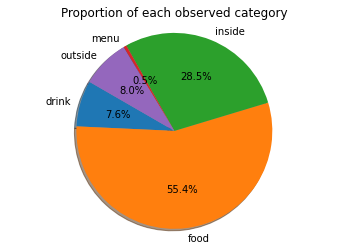

In [50]:
size = np.bincount(y)
explode = (0,0,0,0,0,0)
plt.pie(size,explode=None, labels=classes,autopct = '%1.1f%%', shadow=True, startangle = 150)
plt.axis('equal')
plt.title("Proportion of each observed category")

plt.show()

### Normalizing the data

In [51]:
X_train_mean = np.mean(X_train_)
X_train_std = np.std(X_train_)

X_test_mean = np.mean(X_test_)
X_test_std = np.std(X_test_)

X_train = (X_train_ - X_train_mean)/X_train_std
X_test = (X_test_ - X_test_mean) / X_test_std

### Reshaping the data

In [52]:
X_train = X_train.reshape(X_train.shape[0], *(75,75,3))
X_test = X_test.reshape(X_test.shape[0], *(75,75,3))

In [53]:
print("Shape of train images is: ", X_train.shape)
print("Shape of test images is: ", X_test.shape)
print("Shape of lables is: ", y_train.shape)
print("Shape of labels is: ", y_test.shape)

Shape of train images is:  (800, 75, 75, 3)
Shape of test images is:  (200, 75, 75, 3)
Shape of lables is:  (800,)
Shape of labels is:  (200,)


In [54]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [55]:
def display_image(categories, images, labels):
  """
  branching of the rand_pic function
  displays 25 images with their labels
  """
  fig = plt.figure(figsize=(10,10))
  fig.suptitle("Some examples of images of the dataset", fontsize =15)
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(categories[labels[i]])
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

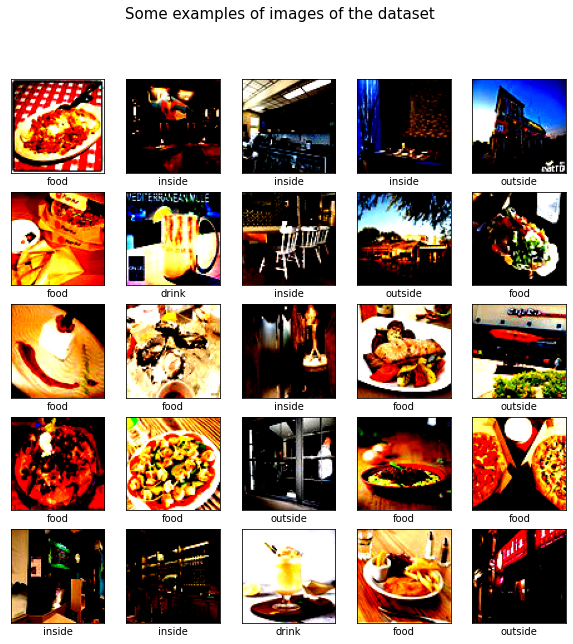

In [56]:
display_image(classes, X_train, y_train)

## Model building

In [57]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input, Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, MaxPool2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
#from tensorflow.python.keras.preprocessing import image
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.python import keras 

### Building CNN

In [58]:
# initializing a sequential model
model = Sequential()
#convolution layer 
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (75,75,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
#2nd convolutional layer 
model.add(Conv2D(32,(3,3), activation = 'relu'))
#2nd pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

# #first layer 
# model.add(Dense(32, activation = 'relu'))
# #second layer 
# model.add(Dense(32, activation = 'relu'))
# ##third layer
# model.add(Dense(32, activation = 'relu'))
# #output layer
# model.add(Dense(5, activation = 'softmax'))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [60]:
#compile the model 
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.00001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
#fitting the model 
history = model.fit(X_train, y_train, validation_split=0.20, epochs = 40)

Epoch 1/40
20/20 [==============================] - 5s 225ms/step - loss: 2.2975 - accuracy: 0.1729 - val_loss: 1.6032 - val_accuracy: 0.5813
Epoch 2/40
20/20 [==============================] - 4s 200ms/step - loss: 1.6879 - accuracy: 0.4847 - val_loss: 1.2605 - val_accuracy: 0.5813
Epoch 3/40
20/20 [==============================] - 4s 201ms/step - loss: 1.3637 - accuracy: 0.5704 - val_loss: 1.1222 - val_accuracy: 0.5813
Epoch 4/40
20/20 [==============================] - 4s 216ms/step - loss: 1.2712 - accuracy: 0.5738 - val_loss: 1.0491 - val_accuracy: 0.5875
Epoch 5/40
20/20 [==============================] - 4s 215ms/step - loss: 1.2410 - accuracy: 0.5709 - val_loss: 1.0064 - val_accuracy: 0.6187
Epoch 6/40
20/20 [==============================] - 5s 243ms/step - loss: 1.1909 - accuracy: 0.5947 - val_loss: 0.9775 - val_accuracy: 0.6250
Epoch 7/40
20/20 [==============================] - 5s 230ms/step - loss: 1.1702 - accuracy: 0.5644 - val_loss: 0.9561 - val_accuracy: 0.6375
Epoch 

### Evaluation

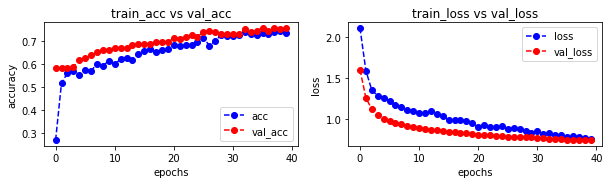

In [62]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo--', label='acc')
plt.plot(history.history['val_accuracy'], 'ro--',label='val_acc')
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()


plt.subplot(222)
plt.plot(history.history['loss'], 'bo--', label="loss")
plt.plot(history.history['val_loss'], 'ro--', label='val_loss')
plt.title('train_loss vs val_loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.show()

In [63]:
loss_test =model.evaluate(X_test,y_test)

7/7 [==============================] - 1s 62ms/step - loss: 0.8403 - accuracy: 0.6600


In [64]:
preds= model.predict_proba(X_test)
pred_labels = np.argmax(preds, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

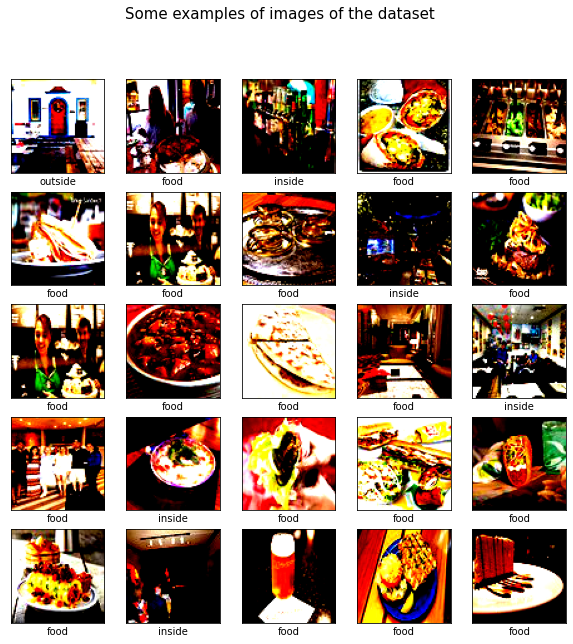

In [65]:
display_image(classes, X_test, pred_labels)

In [66]:
def output_mistakened_images(categories, test_pics,test_labels,pred_labels):
  """
  
  prints mislabeled images by classifier when test_labels != pred_labels
  
  """

  incorrect = (test_labels == pred_labels)
  mislabeled_indices = np.where(incorrect==0)
  mislabeled_images = test_pics[mislabeled_indices]
  mislabeled_labels = pred_labels[mislabeled_indices]

  title = "some examples of misclassified images"
  display_image(categories, mislabeled_images, mislabeled_labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

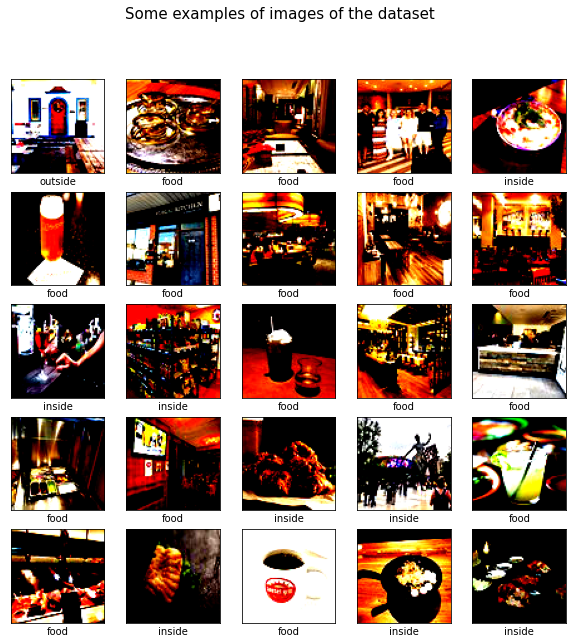

In [67]:
output_mistakened_images(classes,X_test, y_test, pred_labels)

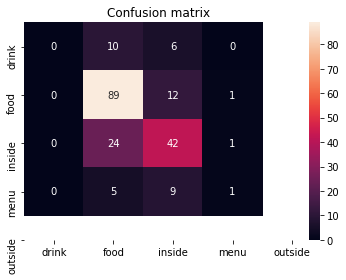

In [68]:
CM = confusion_matrix(y_test, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=classes, 
           yticklabels=classes, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [69]:
#print("Evaluate on test data")
#y_pred_keras = model.predict(X_test)
#fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

## Hyperparameter Tuning

In [70]:
def run_model(optimizer='adam'):
  # initializing a sequential model
  model = Sequential()
  #convolution layer 
  model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (75,75,3)))
  #pooling layer  
  model.add(MaxPooling2D(2,2))
  #2nd convolutional layer 
  model.add(Conv2D(32,(3,3), activation = 'relu'))
  #2nd pooling layer
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation = 'softmax'))
  model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.00001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model 

In [71]:
keras_model = KerasClassifier(build_fn= run_model, verbose=0)

### GridSearchCV

In [72]:
batch_size = [50,100,150]
epochs = [10, 20, 25,40]
optimizer = ['adam', 'SGD', 'RMSprop']
learn_rate = [0.0001, 0.001, 0.01]
param_grid = dict(batch_size = batch_size, epochs = epochs, optimizer = optimizer)
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs = -1, cv=3)

In [73]:
gcv_result = grid.fit(X, y)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [74]:
print("Best accuracy: {}\nBest Combination: {}".format(gcv_result.best_score_, gcv_result.best_params_))

Best accuracy: 0.6000221769014994
Best Combination: {'batch_size': 50, 'epochs': 10, 'optimizer': 'adam'}


In [75]:
means = gcv_result.cv_results_['mean_test_score']
stds = gcv_result.cv_results_['std_test_score']
params = gcv_result.cv_results_['params']

#for mean, stdev, param in zip(means, stds, params):
#  print("%f (%f) with: %r" % (mean,stdev, param))

In [76]:
results_df = pd.DataFrame(params)
results_df["mean"] = means
results_df['std'] = stds

In [77]:
results_df.head()

,batch_size,epochs,optimizer,mean,std
0,50,10,adam,0.600022,0.017877
1,50,10,SGD,0.594007,0.008938
2,50,10,RMSprop,0.567034,0.025594
3,50,20,adam,0.580988,0.024749
4,50,20,SGD,0.556967,0.035597


In [78]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
results = cross_val_score(keras_model, X, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.5580000042915344


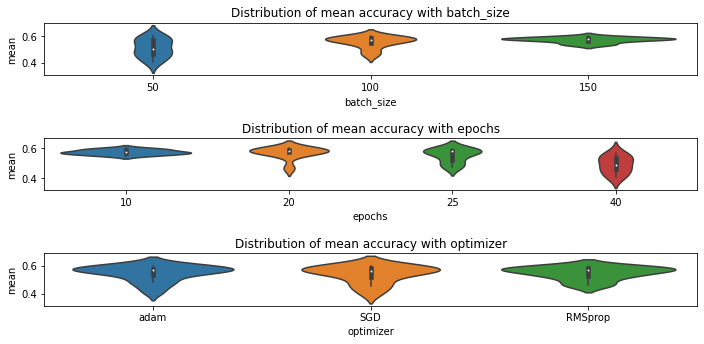

In [84]:
param_ = ['batch_size', "epochs","optimizer"]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5), squeeze=False)
ax = ax.ravel()
for i in range(3):
  ax[i].set_title("Distribution of mean accuracy with {}".format(param_[i]))
  sns.violinplot(x=param_[i], y = 'mean', data = results_df, ax=ax[i])
fig.tight_layout(pad=1.5)

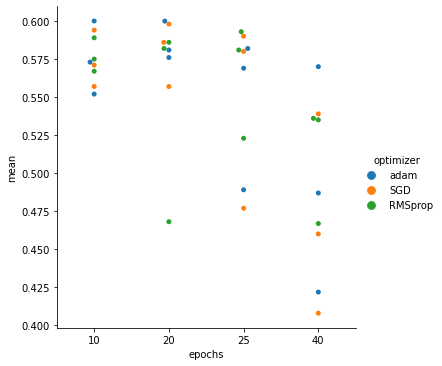

In [85]:
sns.catplot(x='epochs', y='mean', hue='optimizer', kind='swarm', data=results_df)

### Saving Model

In [86]:
MODEL_FILE = "/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/CNN_ADAM.model"

In [87]:
model.save(MODEL_FILE)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/CNN_ADAM.model/assets


## Resources



*   https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/ 
*   https://arxiv.org/pdf/1505.04597.pdf 
* https://arxiv.org/pdf/1612.03144.pdf 
* https://www.kaggle.com/vincee/intel-image-classification-cnn-keras


